In [6]:
%matplotlib inline

In [1]:
'''Trains a LSTM on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
Notes:
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...


In [3]:
y_train.shape

(25000,)

(array([ 12500.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12500.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

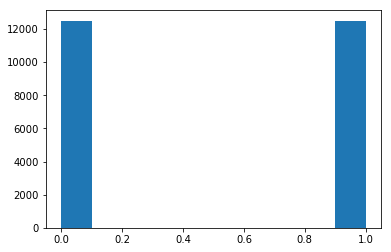

In [7]:
import matplotlib.pyplot as plt
plt.hist(y_train)

In [1]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 181s - loss: 0.4552 - acc: 0.7838 - val_loss: 0.3707 - val_acc: 0.8392
Epoch 2/15
25000/25000 [==============================] - 179s - loss: 0.2964 - acc: 0.8801 - val_loss: 0.3803 - val_acc: 0.8304
Epoch 3/15
25000/25000 [==============================] - 179s - loss: 0.2121 - acc: 0.9182 - val_loss: 0.4190 - val_acc: 0.8274
Epoch 4/15
25000/25000 [==============================] - 179s - loss: 0.1486 - acc: 0.9447 - val_loss: 0.5269 - val_acc: 0.8250
Epoch 5/15
25000/25000 [==============================] - 178s - loss: 0.1022 - acc: 0.9626 - val_loss: 0.5790 - val_acc: 0.8206
Epoch 6/15
25000/25000 [==============================] - 178s - loss: 0.0728 - acc: 0.9739 - val_loss: 0.6543 - val_acc: 0.8205
Epoch 7/1